In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
import random
from scipy import stats as st

##1

In [3]:
sample = []

for i in range(5):
  roll = random.randint(1,8)
  sample.append(roll)

In [4]:
sample

[3, 3, 7, 8, 7]

In [5]:
np.mean(sample)

np.float64(5.6)

In [6]:
np.std(sample, ddof=1)

np.float64(2.4083189157584592)

##2

In [7]:
means=[]
n=5
m=10000

In [8]:
for _ in range(m):
  roll_2=[random.randint(1,8) for _ in range(5)]
  roll_2avg= sum(roll_2)/n
  means.append(roll_2avg)

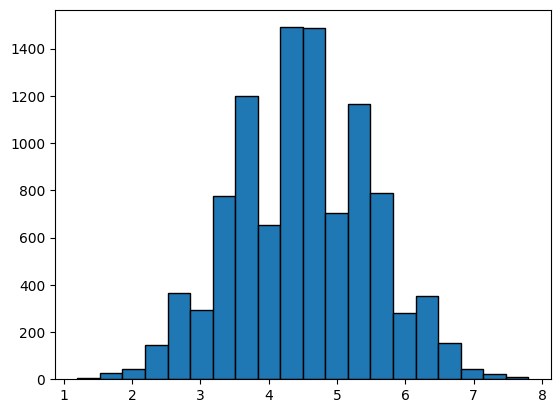

In [25]:
plt.hist(means, bins=20, edgecolor='black')
plt.show()

##3

In [10]:
se=np.std(means, ddof=1)

In [11]:
lower1=np.quantile(means, .025)
upper1=np.quantile(means, .975)
lower2=np.mean(means)- 1.96*se
upper2=np.mean(means) + 1.96*se

In [12]:
print(lower1, lower2)

2.6 2.5118513800201647


In [13]:
print(upper1, upper2)

6.4 6.486348619979836


##4

In [14]:
mean_1=np.mean(sample)
std_1=np.std(sample, ddof=1)
n=5

In [15]:
clt_lower=mean_1- 2.776*(std_1/np.sqrt(n))
clt_upper=mean_1+ 2.776*(std_1/np.sqrt(n))

In [16]:
print(clt_lower, clt_upper)

2.6101564990789234 8.589843500921075


##5

In [31]:
aar_means=np.array(means)

In [38]:
np.sum(aar_means>5.5)

np.int64(1649)

In [39]:
np.sum(aar_means>5.5)/m

np.float64(0.1649)

The probability of getting a bonus is 16.49%.

FYI:

For Question 5 and 6 I used the mean and std from the 10,000 sample ran in problem 3 and not from the single sample in problem 1.

##6

In [46]:
1-st.t.cdf(x=5.5, df=4,loc=np.mean(means),scale=np.std(means, ddof=1))

np.float64(0.18972101203260294)

##7

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ncrowder/DOS/main/heights.csv')
df

In [ ]:
adults=df.us_heights.values.tolist()

In [ ]:
adults

In [ ]:
jockeys=df.jockey_heights.values.tolist()
jockeys

In [ ]:
diffs=[]
for _ in range(500):
  sample_adult=np.random.choice(adults, size=10, replace=True)
  sample_jockey=np.random.choice(jockeys,size=10, replace=True)
  adult_mean=np.mean(sample_adult)
  jockey_mean=np.mean(sample_jockey)
  diff=abs(adult_mean-jockey_mean)
  diffs.append(diff)

In [ ]:
#diffs

##8

In [ ]:
diffs_lower=np.quantile(diffs, .025)
diffs_upper=np.quantile(diffs, .975)
print(diffs_lower, diffs_upper)

In [ ]:
plt.hist(diffs, bins=20, edgecolor='black')
plt.axvline(diffs_lower,color='red',linestyle='--')
plt.axvline(diffs_upper,color='red',linestyle='--')
plt.xlabel('Mean Difference')
plt.title('Distribution of Mean Difference')
plt.axvline(np.mean(diffs),color='yellow',linestyle='-')
plt.show()

##9

In [47]:
bag1 = [[1,2,3,4,4,-4],[1,-2,3,4,5,-6]]
bag2 = [[1,2,3,4,5,5],[1,-2,3,4,5,6],[1,1,1,-5,5,6]]
bag3 = [[1,2,3,-3,4,-4],[1,2,3,4,5,-6]]

In [48]:
results=[]
for _ in range(5000):
  bag_index1= random.randint(0,1)
  die_index1= random.randint(0,5)
  bag_index2= random.randint(0,2)
  die_index2= random.randint(0,5)
  bag_index3= random.randint(0,1)
  die_index3= random.randint(0,5)
  die1=bag1[bag_index1][die_index1]
  die2=bag2[bag_index2][die_index2]
  die3=bag3[bag_index3][die_index3]
  total=die1 + die2 + die3
  results.append(total)

In [50]:
#results

In [51]:
arr_results=np.array(results)

In [54]:
np.sum(arr_results<0)/5000

np.float64(0.1636)

The probability of winning a gajillion dollars is 16.36%

In [59]:
st.t.cdf(x=-1, df=4,loc=np.mean(results),scale=np.std(results, ddof=1))

np.float64(0.1697777645675986)

##10

In [74]:
accidents= st.poisson.rvs(mu=3,size=120)

In [75]:
accidents

array([4, 4, 2, 3, 4, 4, 4, 2, 5, 5, 6, 7, 3, 2, 6, 1, 6, 4, 1, 4, 6, 2,
       1, 3, 0, 3, 4, 3, 4, 4, 4, 6, 2, 4, 1, 4, 6, 5, 1, 1, 2, 5, 2, 1,
       4, 3, 5, 7, 3, 3, 5, 3, 4, 2, 4, 3, 5, 1, 3, 5, 3, 2, 3, 1, 2, 2,
       5, 5, 4, 2, 4, 4, 1, 4, 3, 5, 2, 5, 2, 2, 5, 5, 3, 2, 4, 4, 7, 4,
       0, 3, 2, 4, 2, 2, 4, 5, 5, 1, 1, 3, 2, 2, 4, 3, 5, 1, 2, 3, 3, 2,
       1, 5, 0, 4, 4, 5, 3, 2, 5, 3])

In [76]:
np.sum(accidents==0)/120 + np.sum(accidents>4)/120

np.float64(0.26666666666666666)

The probability of having exactly 0 or more than 4 accidents in a month is 26.67%

##11

In [77]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ncrowder/DOS/main/diabetes.csv')

In [78]:
df2

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,y
0,59,2,32.100000,101.000000,157,93.200000,38.000000,4.000000,4.859800,87,151
1,48,1,21.600000,87.000000,183,103.200000,70.000000,3.000000,3.891800,69,75
2,72,2,30.500000,93.000000,156,93.600000,41.000000,4.000000,4.672800,85,141
3,24,1,25.300000,84.000000,198,131.400000,40.000000,5.000000,4.890300,89,206
4,50,1,23.000000,101.000000,192,125.400000,52.000000,4.000000,4.290500,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.200000,112.000000,185,113.800000,42.000000,4.000000,4.983600,93,178
438,47,2,24.900000,75.000000,225,166.000000,42.000000,5.000000,4.442700,102,104
439,60,2,24.900000,99.670000,162,106.600000,43.000000,3.770000,4.127100,95,132
440,36,1,30.000000,95.000000,201,125.200000,42.000000,4.790000,5.129900,85,220


In [83]:
df2.corr()['y'].sort_values(ascending=False)

,y
y,1.000000
bmi,0.586450
ltg,0.565883
bp,0.441482
tch,0.430453
glu,0.382483
tc,0.212022
age,0.187889
ldl,0.174054
sex,0.043062


In [86]:
df2_x=df2[['bmi','ltg']]
df2_x

,bmi,ltg
0,32.100000,4.859800
1,21.600000,3.891800
2,30.500000,4.672800
3,25.300000,4.890300
4,23.000000,4.290500
...,...,...
437,28.200000,4.983600
438,24.900000,4.442700
439,24.900000,4.127100
440,30.000000,5.129900


In [89]:
df2_y=df2.y
df2_y

,y
0,151
1,75
2,141
3,206
4,135
...,...
437,178
438,104
439,132
440,220


In [94]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model_dia= model.fit(df2_x,df2_y)

##12

In [97]:
mean_dia=df2_x.mean()
cov_dia=df2_x.cov()

In [100]:
mean_dia

,0
bmi,26.375792
ltg,4.641411


##13

In [98]:
sim_results=st.multivariate_normal.rvs(mean=mean_dia, size=5000,cov=cov_dia)

In [99]:
sim_results

array([[23.71110349,  4.09369092],
       [25.52011026,  4.16891395],
       [33.22419409,  4.50783766],
       ...,
       [22.4203392 ,  4.09817345],
       [23.59317771,  3.06932756],
       [21.41001314,  3.88531956]])

In [101]:
df2_sim=pd.DataFrame(sim_results, columns=['bmi','ltg'])

In [103]:
df2_sim.head()

,bmi,ltg
0,23.711103,4.093691
1,25.520110,4.168914
2,33.224194,4.507838
3,32.745521,4.679870
4,23.106258,3.764155


##14

In [105]:
y_pred=model_dia.predict(df2_sim)
y_pred

array([102.0420092 , 119.42107506, 194.47483146, ...,  92.90168196,
        43.76187207,  73.61872883])

In [106]:
df2_sim['y_pred']=y_pred

In [107]:
df2_sim

,bmi,ltg,y_pred
0,23.711103,4.093691,102.042009
1,25.520110,4.168914,119.421075
2,33.224194,4.507838,194.474831
3,32.745521,4.679870,200.635492
4,23.106258,3.764155,79.168554
...,...,...,...
4995,19.785642,4.565045,99.902749
4996,30.952063,5.493570,233.199382
4997,22.420339,4.098173,92.901682
4998,23.593178,3.069328,43.761872


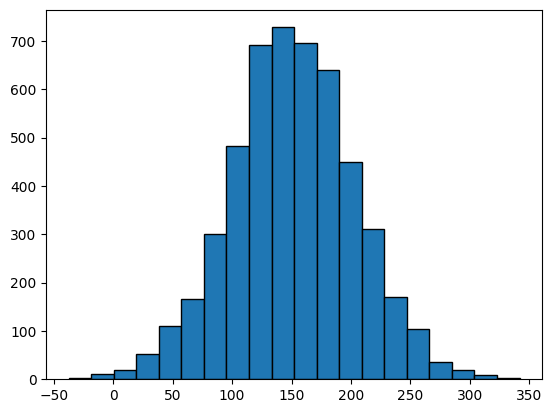

In [109]:
plt.hist(y_pred, bins=20, edgecolor='black')
plt.show()

##15

In [127]:
sim_diffs=[]

for _ in range(500):
  new_samp=df2_sim.sample(n=500, replace=True)
  bmi20=np.quantile(new_samp['bmi'],.2)
  bmi80=np.quantile(new_samp['bmi'],.8)
  ltg20=np.quantile(new_samp['ltg'],.2)
  ltg80=np.quantile(new_samp['ltg'],.8)
  q80=new_samp[(new_samp.bmi>bmi80) & (new_samp.ltg>ltg80)]
  q20=new_samp[(new_samp.bmi<bmi20) & (new_samp.ltg<ltg20)]
  q80_outcome=np.mean(q80.y_pred)
  q20_outcome=np.mean(q20.y_pred)
  sim_diff= q80_outcome - q20_outcome
  sim_diffs.append(sim_diff)


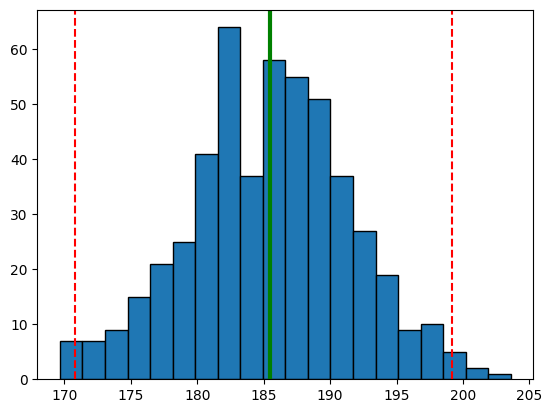

In [141]:
plt.hist(sim_diffs, bins=20, edgecolor='black')
plt.axvline(np.mean(sim_diffs), color='green', linewidth=3)
lower=np.quantile(sim_diffs, .01)
upper=np.quantile(sim_diffs, .99)
plt.axvline(lower, color='red', linestyle='--')
plt.axvline(upper, color='red', linestyle='--')
plt.show()

In [142]:
CI_range98=upper-lower
CI_range98

np.float64(28.33967220350911)

##16

In [180]:
values= st.laplace.rvs(size=1000) + st.norm.rvs(0, .5, 1000)

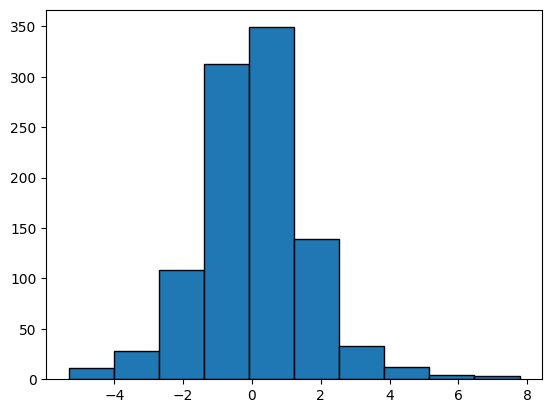

In [181]:
plt.hist(values, edgecolor='black')
plt.show()

In [182]:
dists=[st.laplace,st.norm,st.expon,st.triang]
for dist in dists:
  par=dist.fit(values)
  mle=dist.nnlf(par,values)
  print(f'{dist.name}: {mle}')

laplace: 1836.6375388703757
norm: 1873.34855835172
expon: 2683.248109466483
triang: 2118.9694160287336


After adding some noise, the best distribution is still the Laplace.

##17

In [202]:
for std in np.arange(.50,2.01,.01):
  values2= st.laplace.rvs(size=1000) + st.norm.rvs(0, std, 1000)

  nnlfs={}
  for dist in dists:
    par=dist.fit(values2)
    nnlfs[dist.name]=dist.nnlf(par,values2)

  best_dist=min(nnlfs, key=nnlfs.get)
  if best_dist=='norm':
    print(f'{best_dist} at {std}')
    break


norm at 0.7400000000000002


In [203]:
nnlfs

{'laplace': np.float64(1840.0178932429997),
 'norm': np.float64(1831.1896193545297),
 'expon': np.float64(2921.7825826954486),
 'triang': np.float64(2053.889144627522)}